## 1.0 Business Understanding

Microsoft, a global technology leader, is diversifying its portfolio by entering the entertainment industry through the creation of a new movie studio. This venture aims to leverage Microsoft's resources, reach, and creativity to produce original and engaging films to diversify their portolio.

# Domain of the Business

The domain of this business venture is the film and entertainment industry. Microsoft intends to produce, distribute, and promote movies for theatrical release and streaming platforms. 

# Business Objective

To establish a successful movie studio producing films that entertain, engage, and resonate with diverse audiences while generating revenue.

# Data Understanding

This dataset comprises two main tables. The first table has 6 columns. These columns provide information about various movies, including their titles, release years, durations, genres, and ratings.

The second dataset contains 6 columns. This table focuses on financial aspects, including production budgets, domestic and worldwide gross earnings, and release dates.

The analysis contains the following:
1. Business Understanding
2. Importing libraries and datasets
3. Previewing the datasets
4. Data Cleaning
5. Exploratory data analysis(Univeriate, Bivariate and Multivariate)
6. Summary
7. Recommendations

## 2.0 Importing Data

In [65]:
# We begin by importing the relevant libraries that will be used
import pandas as pd
import matplotlib.pyplot as plt
import sqlite3
import seaborn as sns
from ydata_profiling import ProfileReport


To Import Data we will first define a function which will simplify importation

In [66]:
def import_data (file_path, delimiter=',',encoding=None):
    """
    Import data from a file into a Pandas DataFrame.

    Parameters:
        file_path (str): The path to the data file to be imported.
        delimiter (str): The delimiter used to separate values in the file (default is ',').
        encoding (str): The character encoding to be used when reading the file (default is None).

    Returns:
        pd.DataFrame: A Pandas DataFrame containing the imported data.

    Raises:
        ValueError: You are using an invalid delimiter.
    """
    if delimiter == ',':
        return pd.read_csv(file_path,encoding=encoding)
    elif delimiter == '\t':
        return pd.read_csv(file_path,delimiter='\t',encoding=encoding)
    else:
        return print("You are using an invalid delimiter")


In [67]:
imdb_path = r'C:\Users\espym.LAPTOP-41F90NSA\projects\Movie_Project-1\Data\im.db\im.db'
conn = sqlite3.connect(imdb_path)


In [68]:
file_path2 = r'C:\Users\espym.LAPTOP-41F90NSA\projects\Movie_Project-1\Data\tn.movie_budgets.csv.gz'
tn_movieDF = import_data(file_path2)

## 3.0 Preview of Information in the data

Here we just want to have a look at whats contained in the IMDB dataset and just have a proper feel of whats contained in the dataset

In [69]:
#from the imdb database we first want to know the names and number of the tables.
query0 = ("""
    SELECT name
    AS 'Table_Name'
    FROM sqlite_master
    WHERE type = 'table'
;
""")
pd.read_sql(query0,conn)

,Table_Name
0,movie_basics
1,directors
2,known_for
3,movie_akas
4,movie_ratings
5,persons
6,principals
7,writers


In [70]:
# checking for the information contained in the movie basics table
query1 = ("""
    SELECT * 
    FROM movie_basics
    ;
          """)
df = pd.read_sql(query1,conn)
df.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


To get the preview of information from the data in a simplified way, we will define another function that will help do so

In [71]:
def dataframe_preview(df):
    #To get the shape of the dataframe
    print("The shape of the dataframe:")
    print(df.shape)
    print('\n')
    #To get the info of the dataframe
    print("The data in the dataframe:")
    print(df.info())
    print('\n')
    #To get the descriptive statistics of the dataframe
    print("The descriptive stats of the df:")
    print(df.describe())
    #To get the columns of the dataframe
    print("The columns of the dataframe are:")
    print(df.columns)


In [72]:
dataframe_preview(df)

The shape of the dataframe:
(146144, 6)


The data in the dataframe:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   movie_id         146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB
None


The descriptive stats of the df:
          start_year  runtime_minutes
count  146144.000000    114405.000000
mean     2014.621798        86.187247
std         2.733583       166.360590
min      2010.000000         1.000000
25%      2012.000000        70.000000
50%      2015.000000        87.000000
75%      2017.000000        99.000000
max      2115.000000     51420.000000
T

Now that we have a feel of the movie_basics, well also explore movie_ratings table

In [73]:
query2 = ("""
    SELECT * 
    FROM movie_ratings
    ;
        """)
df2 = pd.read_sql(query2,conn)
df2.head()

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


In [74]:
#We will call the function dataframe preview to view the info in the dataframe
dataframe_preview(df2)

The shape of the dataframe:
(73856, 3)


The data in the dataframe:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   movie_id       73856 non-null  object 
 1   averagerating  73856 non-null  float64
 2   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB
None


The descriptive stats of the df:
       averagerating      numvotes
count   73856.000000  7.385600e+04
mean        6.332729  3.523662e+03
std         1.474978  3.029402e+04
min         1.000000  5.000000e+00
25%         5.500000  1.400000e+01
50%         6.500000  4.900000e+01
75%         7.400000  2.820000e+02
max        10.000000  1.841066e+06
The columns of the dataframe are:
Index(['movie_id', 'averagerating', 'numvotes'], dtype='object')


In [75]:
#Now to preview info from the last dataset we will be using
dataframe_preview(tn_movieDF)

The shape of the dataframe:
(5782, 6)


The data in the dataframe:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB
None


The descriptive stats of the df:
                id
count  5782.000000
mean     50.372363
std      28.821076
min       1.000000
25%      25.000000
50%      50.000000
75%      75.000000
max     100.000000
The columns of the dataframe are:
Index(['id', 'release_date', 'movie', 'production_budget', 'domestic_gross',
       'worldwide_gross'],
      dtype='object')


In [76]:
# Checking the first five rows of the dataset
tn_movieDF.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


Now we will preview the dataset using pandas profiling library

In [77]:
# We begin by importing the necessary libraries
from pandas_profiling import ProfileReport
profile = ProfileReport(df)
profile

Render HTML: 100%|██████████| 1/1 [00:00<00:00,  1.10it/s]


In [78]:
profile2 = ProfileReport(tn_movieDF)
profile2

Render HTML: 100%|██████████| 1/1 [00:00<00:00,  1.73it/s]


## 4.0 Data Cleaning

Now that we have a feeling of the data, we will now combine the two tables i.e movie_basics and movie_ratings using their primary key movie_id

In [79]:
#Joining the tables using the movie_id column
query3 = ("""
SELECT movie_id, primary_title,start_year,runtime_minutes,genres,averagerating AS 'movie_rating',numvotes
FROM movie_basics
JOIN movie_ratings
USING (movie_id)
;
""")
df = pd.read_sql(query3,conn)

In [80]:
dataframe_preview(df)

The shape of the dataframe:
(73856, 7)


The data in the dataframe:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   movie_id         73856 non-null  object 
 1   primary_title    73856 non-null  object 
 2   start_year       73856 non-null  int64  
 3   runtime_minutes  66236 non-null  float64
 4   genres           73052 non-null  object 
 5   movie_rating     73856 non-null  float64
 6   numvotes         73856 non-null  int64  
dtypes: float64(2), int64(2), object(3)
memory usage: 3.9+ MB
None


The descriptive stats of the df:
         start_year  runtime_minutes  movie_rating      numvotes
count  73856.000000     66236.000000  73856.000000  7.385600e+04
mean    2014.276132        94.654040      6.332729  3.523662e+03
std        2.614807       208.574111      1.474978  3.029402e+04
min     2010.000000         3.000000      1.0000

We will now go ahead and clean the dataset to remove the missing values in the dataframe. The columns runtime_minutes and genres appear to having missing values

In [81]:
#We first define a function to find the missing values
def missing_values(df):
    print(df.isnull().sum())

In [82]:
#checking for the sum of null values
missing_values(df)

movie_id              0
primary_title         0
start_year            0
runtime_minutes    7620
genres              804
movie_rating          0
numvotes              0
dtype: int64


In [83]:
#checking for all the values
null_count = df.isnull().sum()
non_null_count = df.shape[0]
print(null_count)
print("The non null values in the dataset are:", non_null_count)

movie_id              0
primary_title         0
start_year            0
runtime_minutes    7620
genres              804
movie_rating          0
numvotes              0
dtype: int64
The non null values in the dataset are: 73856


In [84]:
#checking the percentage of the null values to determine if to drop them
null_percentage = (null_count / non_null_count) * 100
print(null_percentage)

movie_id            0.000000
primary_title       0.000000
start_year          0.000000
runtime_minutes    10.317374
genres              1.088605
movie_rating        0.000000
numvotes            0.000000
dtype: float64


In [85]:
#The null values take a minimal percentage of the total values and can be droppped
df.dropna(inplace=True)
df.shape

(65720, 7)

In [86]:
#checking null values in the other dataframe
budgetDF = tn_movieDF
missing_values(budgetDF)

id                   0
release_date         0
movie                0
production_budget    0
domestic_gross       0
worldwide_gross      0
dtype: int64


The budget dataframe contains no null values

Checking for duplicates 


In [87]:
#we first define a function that will check for duplicated values in both dataframes
def duplicated_values(df):
    print("The duplicated values are:")
    print(df.duplicated().sum())

In [88]:
#Checking for duplicates in the first dataframe
duplicated_values(df)

The duplicated values are:
0


In [89]:
#checking for duplicates in the second dataframe
duplicated_values(budgetDF)

The duplicated values are:
0


From both datasets there are no duplicated values

Conversion of datatypes

In [90]:
# We use the mothod .info() to grasp the data types in the dataframe
budgetDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


The prodution_budget,domestic_gross and worldwide_gross are denoted as objects and we need them as float in order to mathematical computations


In [91]:
#Conversion of The prodution_budget,domestic_gross and worldwide_gross to float
budgetDF['production_budget'] = budgetDF['production_budget'].str.replace('$', '').str.replace(',', '').astype(float)
budgetDF['domestic_gross'] = budgetDF['domestic_gross'].str.replace('$', '').str.replace(',', '').astype(float)
budgetDF['worldwide_gross'] = budgetDF['worldwide_gross'].str.replace('$', '').str.replace(',', '').astype(float)

Checking for data consistency

In [92]:
df.describe()

,start_year,runtime_minutes,movie_rating,numvotes
count,65720.000000,65720.000000,65720.000000,6.572000e+04
mean,2014.258065,94.732273,6.320902,3.954674e+03
std,2.600143,209.377017,1.458878,3.208823e+04
min,2010.000000,3.000000,1.000000,5.000000e+00
25%,2012.000000,81.000000,5.500000,1.600000e+01
50%,2014.000000,91.000000,6.500000,6.200000e+01
75%,2016.000000,104.000000,7.300000,3.520000e+02
max,2019.000000,51420.000000,10.000000,1.841066e+06


From this we have a few issues in regards to runtime
1. The minimum runtime is 3 minutes which is quite low to meet a movie threshold
2. The maximum runtime is 51420 which an extreme value

In [93]:
# Filtering the values to include a minimum threshold of 20 minutes and 180 minutes 
clean_runtime = df[(df['runtime_minutes'] >= 20) & (df['runtime_minutes'] <= 180)]
sum_of_movies_within_threshold = len(clean_runtime)
print('The movies within the threshold are:', sum_of_movies_within_threshold)

The movies within the threshold are: 65365


In [94]:
# Converting the dataframe to drop all values outside the threshold
df = df[(df['runtime_minutes'] >= 20) & (df['runtime_minutes'] <= 200)]

In [95]:
budgetDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5782 non-null   int64  
 1   release_date       5782 non-null   object 
 2   movie              5782 non-null   object 
 3   production_budget  5782 non-null   float64
 4   domestic_gross     5782 non-null   float64
 5   worldwide_gross    5782 non-null   float64
dtypes: float64(3), int64(1), object(2)
memory usage: 271.2+ KB


For the budget dataframe, We have an issue with the release date as its an object and its needed to be in date format

In [96]:
#conversion of release date from object to datetime
budgetDF['release_date'] = pd.to_datetime(budgetDF['release_date'])

In [97]:
#checking for the duration of info in the budget dataframe
start_date = budgetDF['release_date'].min()
end_date = budgetDF['release_date'].max()

print(f'the start date is {start_date} and the end date is {end_date}')


the start date is 1915-02-08 00:00:00 and the end date is 2020-12-31 00:00:00


From this there a few issues:
1. The first date is 1915 which is significantly a long time ago and the film and production industry has changed in one way or another. 
We will now convert the dataframe to start in the the year 2000 - 2019 which are relevant to the analysis
2. 2020 has no gross earnings

In [98]:
start_date = pd.to_datetime('2000-1-1 00:00:00')
end_date = pd.to_datetime('2019-12-31 00:00:00')
budgetDF = budgetDF[(budgetDF['release_date'] >= start_date) & (budgetDF['release_date'] <= end_date)]

## 5.0 Explarotary Analysis

In [99]:
#checking for the year and duration of the release dates in imdb dataset
start_date = df['start_year'].min()
end_date = df['start_year'].max()
period_taken = end_date - start_date

print('start:', start_date)
print('stop:', end_date)
print('durarion:', period_taken,'years')

start: 2010
stop: 2019
durarion: 9 years


In [100]:
#checking for the duration of info in the budget dataframe
start_date = budgetDF['release_date'].min()
end_date = budgetDF['release_date'].max()
period_taken = end_date -  start_date

print('The start date is', start_date)
print('The end date id', end_date)
print('Period of the dataset is', period_taken)

The start date is 2000-01-12 00:00:00
The end date id 2019-12-31 00:00:00
Period of the dataset is 7293 days 00:00:00


For easier analysis we need to know what rows to use and therefore we will define a function for this

In [101]:
#Defining the function
def columns(df):
    print(df.columns)

In [102]:
columns(df)

Index(['movie_id', 'primary_title', 'start_year', 'runtime_minutes', 'genres',
       'movie_rating', 'numvotes'],
      dtype='object')


5.1 Univariate Analysis

In [103]:
df['primary_title'].describe()

count          65449
unique         62195
top       The Return
freq              10
Name: primary_title, dtype: object

In [104]:
#Checking for the most common genre
df['genres'].describe()


count     65449
unique      905
top       Drama
freq      10160
Name: genres, dtype: object

In [105]:
df['genres'].value_counts()

Drama                         10160
Documentary                    9031
Comedy                         4601
Comedy,Drama                   2449
Horror                         2230
                              ...  
History,Mystery,Thriller          1
Animation,Horror,Sci-Fi           1
Adventure,Biography,Family        1
Action,Drama,News                 1
Drama,Musical,Western             1
Name: genres, Length: 905, dtype: int64

In [106]:
columns(budgetDF)

Index(['id', 'release_date', 'movie', 'production_budget', 'domestic_gross',
       'worldwide_gross'],
      dtype='object')


In [107]:
budgetDF['movie'].describe()

count     4384
unique    4361
top       Home
freq         3
Name: movie, dtype: object

5.2 Bivariate Analysis

How has the average movie runtime changed over the years?

In [108]:
#We first preview all columns to know which one to work with
columns(df)

Index(['movie_id', 'primary_title', 'start_year', 'runtime_minutes', 'genres',
       'movie_rating', 'numvotes'],
      dtype='object')


In [109]:
#Checking for the average movie runtime through the years
runtime_changes_over_years = df.groupby('start_year')['runtime_minutes'].mean()
print(runtime_changes_over_years)

start_year
2010    92.084137
2011    91.889349
2012    91.508410
2013    92.235916
2014    93.131877
2015    93.167301
2016    93.576630
2017    94.554109
2018    96.542604
2019    99.883565
Name: runtime_minutes, dtype: float64


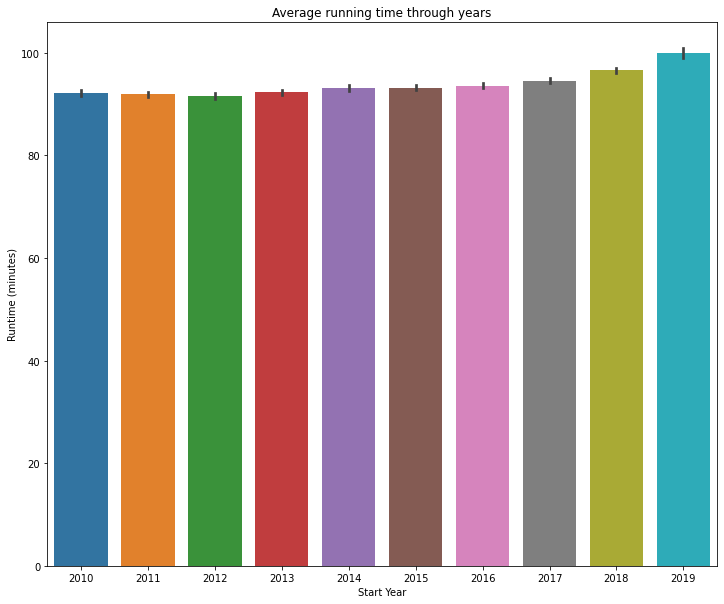

In [110]:
#To visualize the average runtime through the years
plt.figure(figsize=(12,10))
sns.barplot(x='start_year', y='runtime_minutes', data=df)
plt.title('Average running time through years')
plt.xlabel('Start Year')
plt.ylabel('Runtime (minutes)')
plt.show()

This shows that the average runtime for movies from 2010 -2019 has been 90 minutes. This implies that the ideal running time for a film is 90 minutes.

Checking the number of movies produced in a year

In [111]:
columns(df)

Index(['movie_id', 'primary_title', 'start_year', 'runtime_minutes', 'genres',
       'movie_rating', 'numvotes'],
      dtype='object')


In [112]:
#checking for the count of movies produced each year
df['start_year'].value_counts()

2016    7745
2017    7679
2015    7621
2014    7507
2013    7189
2012    6837
2018    6537
2011    6525
2010    6014
2019    1795
Name: start_year, dtype: int64

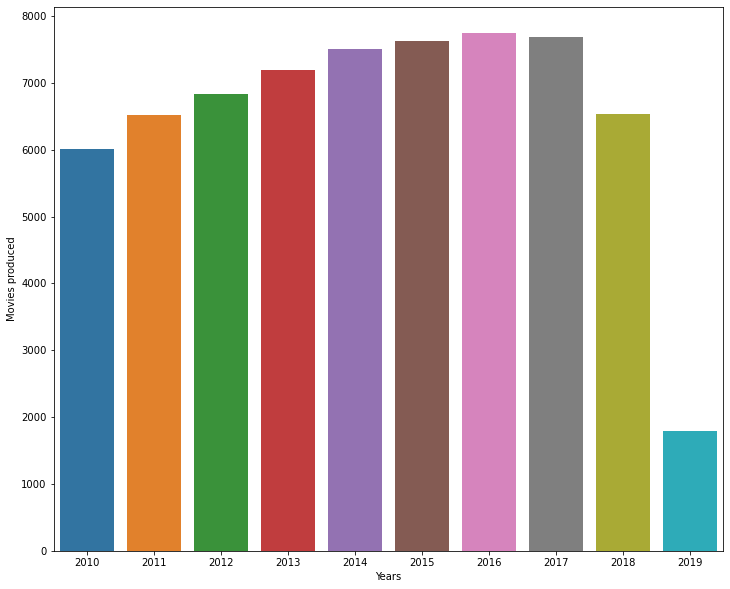

In [113]:
#To visualize this movies produced through the years
plt.figure(figsize=(12,10))
sns.countplot(x='start_year',data=df)
plt.xlabel('Years')
plt.ylabel('Movies produced')
plt.show()


From this countplot we see that in the year 2019 the production of films significantly reduced

Analyzing the distribution between Genres and Runtime

In [114]:
#We first preview columns to know which columns to work with
columns(df)

Index(['movie_id', 'primary_title', 'start_year', 'runtime_minutes', 'genres',
       'movie_rating', 'numvotes'],
      dtype='object')


In [115]:
#Checking for the the first 10 movies with the highest runtimes and their genres
top_10_runtime = df.nlargest(10,'runtime_minutes')[['primary_title','runtime_minutes','genres']].set_index('primary_title')
top_10_runtime

,runtime_minutes,genres
primary_title,,
The Last Pogo Jumps Again,200.0,"Documentary,Music"
Sadiyaan: Boundaries Divide... Love Unites,200.0,"Drama,Romance"
Dickshark,200.0,"Comedy,Sci-Fi"
National Theatre Live: Jane Eyre,200.0,Drama
Walk in My Shoes,200.0,Drama
Jai Bhim Comrade,199.0,Documentary
Tmár a jeho rod aneb Slzavé údolí pyramid,199.0,"Documentary,Mystery"
National Theatre Live: Othello,198.0,Drama
0.5 Mm,198.0,Drama


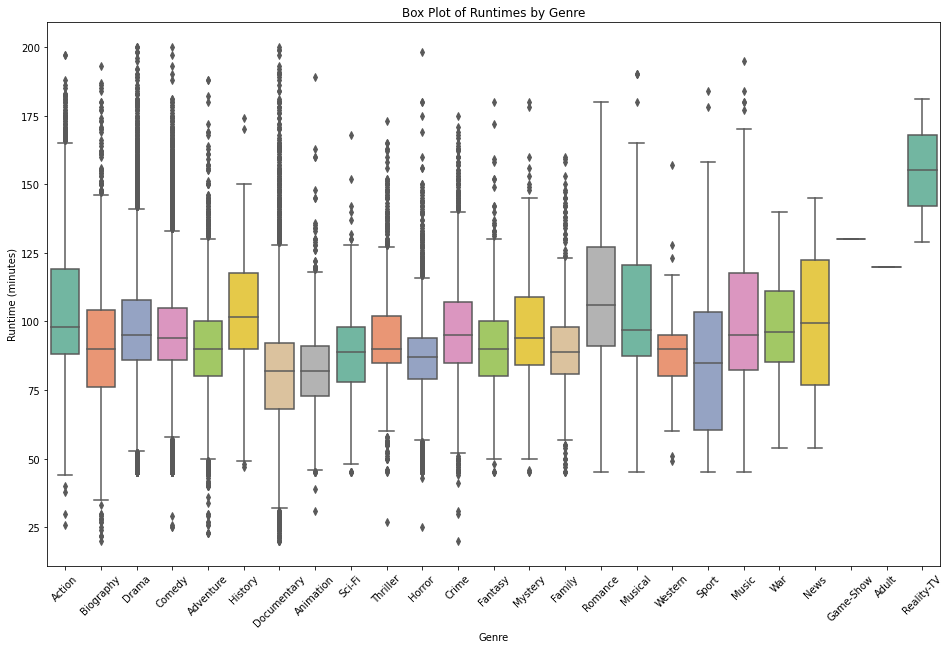

In [116]:
#To visualize the distrubution of runtimes in relation to genres
plt.figure(figsize=(16,10))
df['genre'] = df['genres'].str.split(',').str[0].str.strip()
sns.boxplot(data=df, x='genre', y='runtime_minutes', palette='Set2',showfliers = True)
plt.xlabel('Genre')
plt.ylabel('Runtime (minutes)')
plt.title('Box Plot of Runtimes by Genre')
plt.xticks(rotation=45)
plt.show()


From this boxplot,it is evident that reality TV has higher run times compared to the other genres

2.1.4 Checking for the distribution of ratings and genres through the years

In [117]:
#We first preview columns to know which columns to work with
columns(df)

Index(['movie_id', 'primary_title', 'start_year', 'runtime_minutes', 'genres',
       'movie_rating', 'numvotes', 'genre'],
      dtype='object')


In [118]:
#Checking for the the first 10 movies with the highest runtimes and their genres
top_10_ratings = df.nlargest(10,'movie_rating')[['primary_title','movie_rating','genres']].set_index('primary_title')
top_10_ratings

,movie_rating,genres
primary_title,,
Exteriores: Mulheres Brasileiras na Diplomacia,10.0,Documentary
The Dark Knight: The Ballad of the N Word,10.0,"Comedy,Drama"
Freeing Bernie Baran,10.0,"Crime,Documentary"
Hercule contre Hermès,10.0,Documentary
I Was Born Yesterday!,10.0,Documentary
Revolution Food,10.0,Documentary
Fly High: Story of the Disc Dog,10.0,Documentary
The Paternal Bond: Barbary Macaques,10.0,Documentary
Requiem voor een Boom,10.0,Documentary


From the top 10 top rated movies, documentaries is the top rated genre

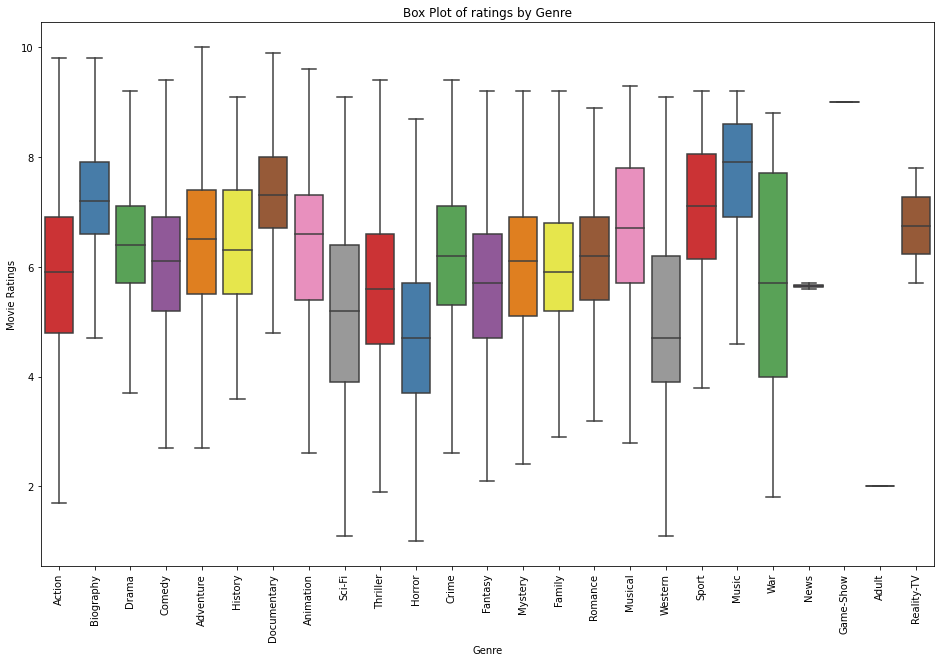

In [119]:
#To visualize the relationship between genres and their ratings
plt.figure(figsize=(16,10))
df['genre'] = df['genres'].str.split(',').str[0].str.strip()
sns.boxplot(data=df, x='genre', y='movie_rating', palette='Set1',showfliers=False)
plt.xlabel('Genre')
plt.ylabel('Movie Ratings')
plt.title('Box Plot of ratings by Genre')
plt.xticks(rotation=90)
plt.show()

From this boxplot, music movies have a higher average rating than the other genres 

2.1.5 Checking for the year with the highest average gross earnings

In [120]:
#We first preview columns to know which columns to work with
budgetDF.columns

Index(['id', 'release_date', 'movie', 'production_budget', 'domestic_gross',
       'worldwide_gross'],
      dtype='object')

The release date is inclusive of date and month and for this we just want the years. We will convert the release date to years only

In [121]:
#conversion to years
budgetDF['release_date'] = budgetDF['release_date'].dt.year

<ipython-input-121-13c939025b43>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  budgetDF['release_date'] = budgetDF['release_date'].dt.year


In [122]:
#Checking for the average earnings of movies through the years
average_earnings = budgetDF.groupby('release_date')['worldwide_gross'].mean().sort_values(ascending=False)
print(average_earnings)

release_date
2018    1.824786e+08
2017    1.692240e+08
2016    1.313614e+08
2012    1.156729e+08
2013    1.107553e+08
2009    1.003943e+08
2019    9.965411e+07
2014    9.911344e+07
2011    9.714671e+07
2004    8.924908e+07
2010    8.843764e+07
2007    8.641767e+07
2015    8.225145e+07
2003    8.209727e+07
2008    8.155407e+07
2001    8.096845e+07
2005    7.888583e+07
2002    7.822510e+07
2006    7.163864e+07
2000    6.891062e+07
Name: worldwide_gross, dtype: float64


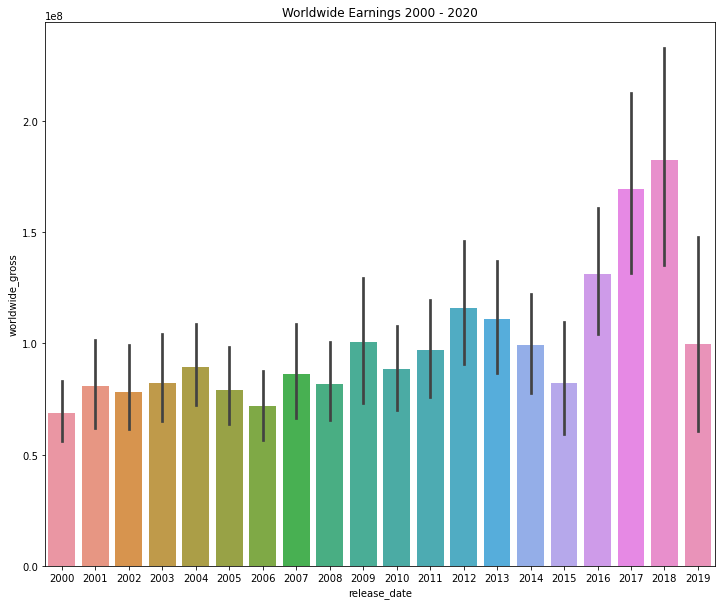

In [123]:
#To visualize the earnings throughout the years
plt.figure(figsize=(12,10))
sns.barplot(x='release_date', y='worldwide_gross',data=budgetDF)
plt.title('Worldwide Earnings 2000 - 2020')
plt.show()

2.1.6 Checking for correlation between budget and worldwide income

In [124]:
#We first preview columns to know which columns to work with
columns(budgetDF)

Index(['id', 'release_date', 'movie', 'production_budget', 'domestic_gross',
       'worldwide_gross'],
      dtype='object')


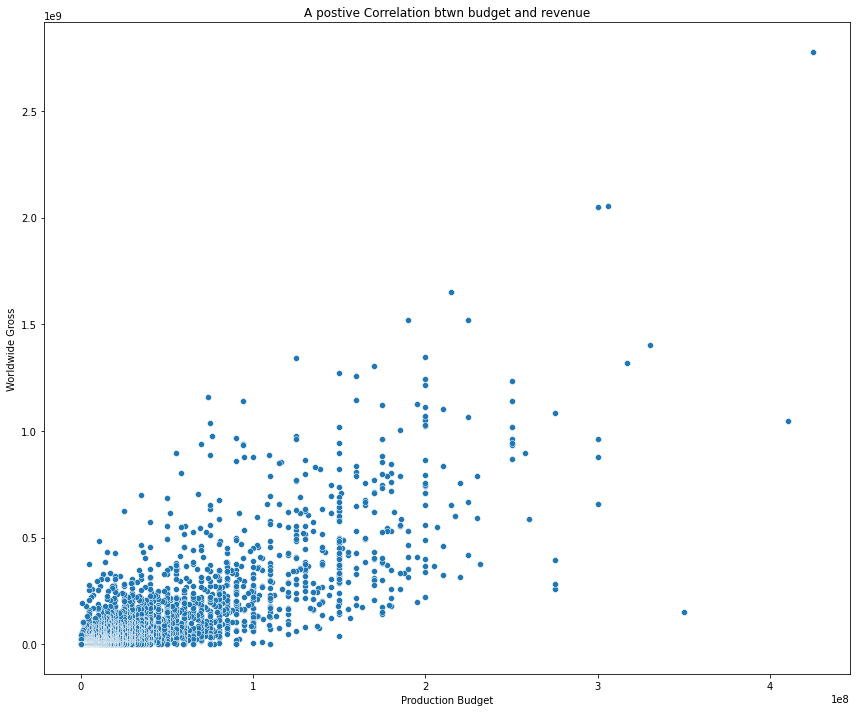

In [125]:
#To visualize the correlation between budget and revenue
plt.figure(figsize=(12,10))
sns.scatterplot(x='production_budget', y='worldwide_gross', data=budgetDF)
plt.title('A postive Correlation btwn budget and revenue')
plt.xlabel('Production Budget')
plt.ylabel('Worldwide Gross')
plt.tight_layout()
plt.show()


From the scatter plot, theres a positive relationship between the budget. This implies that the higher budgeted for films end up having a higher returns

## Summary

Below is a summary of the Analysis:

1. Enhanced Data Quality Assessment:
By addressing missing values, duplicates, and inconsistencies, we have significantly improved the reliability and overall quality of the sales data.
These data enhancements make the dataset more suitable and dependable for subsequent analyses.

2. Evaluated Data Completeness:
We've evaluated the degree of data completeness by determining the percentage of missing values in each column and subsequently taking appropriate actions, including data deletion where necessary.

3. Ensured Data Integrity:
We've identified and rectified data integrity issues such as negative Nan values.
Inaccurate or implausible data points have been either removed from the dataset or corrected, contributing to the overall integrity of the data.

4. Refined Data Types:
A thorough review of data types has been conducted, and necessary adjustments have been made.
Dates have been converted into datetime objects to facilitate time-based analyses.
Production budget, domestic gross and worldwide gross have been converted to float for mathematical computations.

5. Derived Descriptive Statistics:
We've computed descriptive statistics to provide a proper summary of essential dataset attributes.
These statistics include measures of central tendency (mean, median, mode) and measures of data dispersion (range, standard deviation), offering valuable insights into the dataset's characteristics.

6. Optimal Movie Runtime:
The average runtime for successful movies has consistently hovered around 90 minutes, indicating that this runtime is preferred by audiences. 

7. Genre and median ratings
Music-related movies, on average, achieve higher median ratings. Microsoft can consider exploring more music-related genres, but it's important to validate the demand through market research. 

8. Steady Investment Strategy
The data reveals a stable trend in average income per movie, with most years showing earnings around $96 million. This suggests that Microsoft should maintain a steady and sustainable investment in movie production.

9. Production budget and revenue correlation
A positive correlation exists between production budgets and worldwide gross revenue, indicating that higher budgets tend to yield higher returns

## Recommendations

Based on my findings, I would recommend the following to Microsoft:
1. Optimal Movie Runtime:
Consider targeting an average runtime of around 90 minutes for your movies, as this has been the historical average. This duration tends to align with audience preferences and can optimize viewer engagement.

2. Genre Selection:
Given that music movies have a higher median rating, consider producing or investing in music-related films as they have a better chance of receiving favorable ratings from viewers. However, also explore other genres that align with your studio's vision and capabilities.

3. Budget and Revenue:
Recognize the positive correlation between production budget and worldwide gross revenue. While investing more in a movie may lead to higher returns, be cautious and conduct thorough financial analysis and risk assessment for high-budget productions. Consider a balanced portfolio of both high and low-budget films to mitigate risk.

4. Steady Investment:
 Given that the average income per movie has been relatively stable for most years (around $96 million), Microsoft should plan for a steady investment in movie production to maintain consistent revenue. This can involve setting an annual budget for movie production.

5. Diversify Portfolio: 
As evident, movie production took a downward trend in 2019. I would recommend considering diversifying the movie portfolio to mitigate risks associated with fluctuations in movie production. Instead of relying heavily on a single year's output, aim for a more balanced and sustainable production strategy.